# Training

### import modules

In [1]:
import os

from sklearn import preprocessing
from nilearn import image, datasets, input_data, plotting

import pandas as pd

import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

### get list with all training blocks

In [2]:
imgList = ['../train/%s'%x for x in os.listdir('../train/')]; imgList.sort()

In [3]:
imgList[-5:]

['../train/spatial_026_church.nii.gz',
 '../train/spatial_032_basement.nii.gz',
 '../train/spatial_038_promenade.nii.gz',
 '../train/spatial_041_cityofkiel.nii.gz',
 '../train/spatial_049_univesity.nii.gz']

### define a whole-brain masker to extract data

In [4]:
rawMasker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz').fit()

In [5]:
rawMasker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
      mask_strategy='background', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

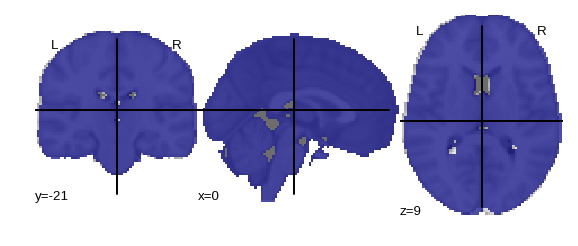

In [6]:
plotting.plot_roi(rawMasker.mask_img_);

### extract data and put into table

In [7]:
def makeBigDf(imgList,masker):
    
    # empty dataframe to write to
    bigDf = pd.DataFrame()
    
    for img in imgList:
        # extract naming of block from file
        thisName = img.split('/')[-1].split('.')[0]
        cond,num,content = thisName.split('_')
        cont = '%s-%s' % (num,content)
        # extract data using masker
        thisDf = pd.DataFrame(masker.transform(img))
        # name index
        thisDf.index = [[cond],[cont]]
        #add to big df
        bigDf = pd.concat([bigDf,thisDf])
    
    bigDf.sort_index(inplace=True)
    
    return bigDf

In [8]:
blockDf = makeBigDf(imgList,rawMasker)

In [9]:
blockDf

0         1         2         3         4       \
faces    004-family       -0.337221 -0.261674 -0.447705 -0.463183 -0.410195   
         007-friends       0.406736  0.427125  0.015802  0.134407  0.305661   
         013-movieactors  -0.803729 -0.765207  0.315829 -0.335106 -0.513710   
         016-athletes      0.416349  0.372681  0.368322  0.256957  0.355814   
         024-tvactors      0.130858 -0.027075 -0.214070  0.041683 -0.042501   
         029-politicians   0.344705  0.118515 -0.089767  0.536890  0.395393   
         033-lectureres    0.278460  0.138843 -0.074483 -0.319463 -0.136159   
         036-teachers     -0.436396 -0.250727  0.840851 -0.930371 -0.639776   
         042-family        0.008166  0.106999  0.300277  0.359707  0.356488   
         047-friends      -0.133380 -0.201361  0.026851 -0.025188 -0.132026   
language 002-animals       0.377199  0.371269  0.208753  0.294844  0.395827   
         006-tools         0.079687  0.169097 -0.180427 -0.336351 -0.157972   
         012-cities       -0.241019 -0.297598  0.307364  0.160643 -0.038029   
         018-countries    -0.154996 -0.147946 -0.474708 -0.483925 -0.400554   
         021-occupations   0.085977 -0.023571  0.044882  0.334655  0.099600   
         028-fruits       -0.344076 -0.413111 -0.984599 -0.113261 -0.468942   
         034-clothing     -0.406813 -0.589992 -0.170627  0.043201 -0.332579   
         039-vegetables   -0.142082  0.120061  0.073976 -0.146874 -0.022732   
         044-furniture    -0.035064  0.176548 -0.059665 -0.041317  0.031542   
         048-colors        0.079452 -0.229015 -0.568590 -0.143852 -0.343691   
motor    005-badminton     0.232851  0.211707  0.175249 -0.179907  0.076884   
         010-tennis        0.323449  0.174717 -0.318922  0.865977  0.457627   
         015-swimming     -0.410231 -0.373177 -0.214435 -0.214162 -0.303867   
         020-soccer       -0.365402 -0.422123 -0.290296 -0.161451 -0.343772   
         025-highjump      0.032260  0.165307 -0.162336 -0.339263 -0.100707   
         030-climbing      0.020211  0.275559 -0.274090 -0.645532 -0.212419   
         035-huerdlerace  -0.468492 -0.304414  0.137848 -0.559517 -0.484426   
         040-archery       0.004247 -0.077519  0.377906 -0.433605 -0.292551   
         045-ropeskipping  0.639702  0.419227  0.176122  0.643087  0.672581   
         050-juggling      1.045404  0.929000 -0.349999  1.053862  1.104148   
rest     001-rest          0.383816  0.345413 -0.421839  0.204600  0.230265   
         009-rest          0.210772  0.154903  0.267624  0.232909  0.227331   
         014-rest         -0.099611 -0.071073  0.516288  0.742223  0.354413   
         019-rest         -0.369821 -0.354001  0.156842  0.201624 -0.084399   
         023-rest          0.800571  0.898288  0.118228  0.316837  0.705255   
         027-rest         -0.130931 -0.234287 -0.026871  0.475138  0.178086   
         031-rest          0.130246  0.095390  0.111923  0.096132  0.105898   
         037-rest          0.308245  0.640333  0.609075 -0.406202  0.198728   
         043-rest          0.026456  0.217737  0.629468 -0.139371  0.156006   
         046-rest         -0.534401 -0.471226  0.334531 -0.261650 -0.351299   
spatial  003-citysquare   -0.409870 -0.343361  0.178760 -0.154857 -0.232968   
         008-market       -0.525955 -0.532538  0.320622 -0.216594 -0.350180   
         011-tramstation   0.027584  0.157118 -0.403917 -0.314847 -0.105826   
         017-trainstation -0.056431 -0.060108  0.103397 -0.234649 -0.114347   
         022-school        0.081708  0.126733  0.112864 -0.253421 -0.009427   
         026-church        0.730507  0.578703  0.119718  1.370857  1.179201   
         032-basement     -0.083324 -0.182674 -0.455861 -0.145466 -0.299387   
         038-promenade     0.174782  0.180183 -0.170454  0.051832  0.114741   
         041-cityofkiel   -0.716268 -0.597343  0.383187 -0.751187 -0.705613   
         049-univesity    -0.095154 -0.263741 -0.714585  0.450920  0.047355   


### get average values per domain

In [10]:
meanBlockDf = blockDf.groupby(level=0).mean()

In [11]:
meanBlockDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
faces,-0.012545,-0.034188,0.104191,-0.074367,-0.046101,-0.055432,-0.090322,-0.025118,0.069478,-0.096511,...,0.004437,-0.045279,0.071516,0.067317,0.038900,-0.021574,0.044016,0.060104,0.095599,-0.115891
language,-0.070173,-0.086426,-0.180364,-0.043224,-0.123753,-0.126199,-0.030064,-0.146192,0.019971,0.261090,...,-0.039210,-0.019452,0.079053,0.081309,-0.057008,-0.282719,0.106061,0.068946,-0.155969,0.097713
motor,0.105400,0.099828,-0.074295,0.002949,0.057350,-0.016113,-0.020634,0.013280,-0.055201,-0.086927,...,-0.021462,0.030139,-0.097034,-0.107705,-0.052706,0.031927,-0.127517,-0.103289,0.088189,-0.030525
rest,0.072534,0.122148,0.229527,0.146224,0.172028,0.144297,0.156701,0.107848,-0.095277,-0.098669,...,0.097766,0.062485,-0.000719,0.001592,0.049477,0.134441,0.006870,0.003413,-0.070590,0.031867
spatial,-0.087242,-0.093703,-0.052627,-0.019741,-0.047645,0.065854,-0.001396,0.035860,0.080060,0.054064,...,-0.042612,-0.063525,-0.075409,-0.063350,0.009957,0.147774,-0.055430,-0.047516,0.056884,-0.012209


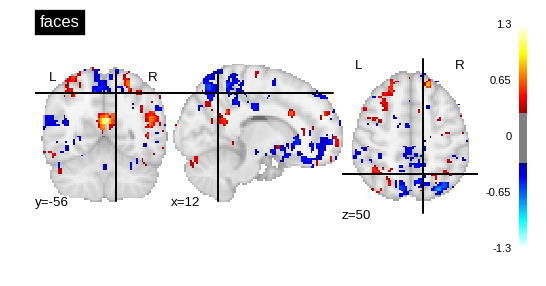

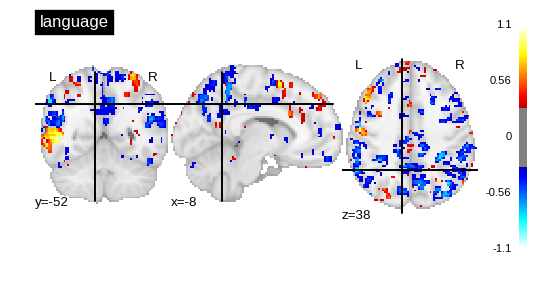

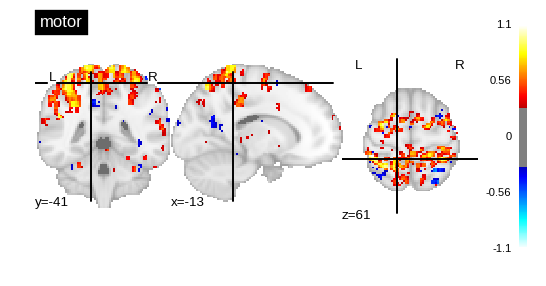

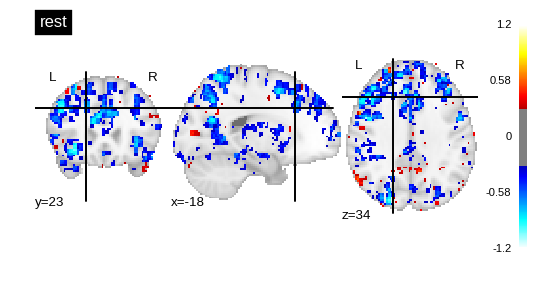

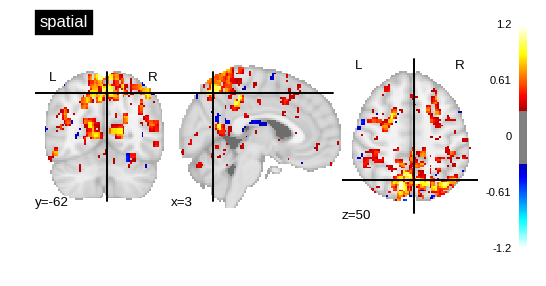

In [15]:
for cond in meanBlockDf.index:
    fig,ax1 = plt.subplots(1,1,figsize=(8,4))
    thisIm = rawMasker.inverse_transform(meanBlockDf.loc[cond])
    thisIm.to_filename('../meanTraining/meanCond_%s.nii.gz'%cond)
    plotting.plot_stat_map(thisIm,title=cond,threshold=0.3,axes=ax1)
    plt.show()

same thing, using smoothing:

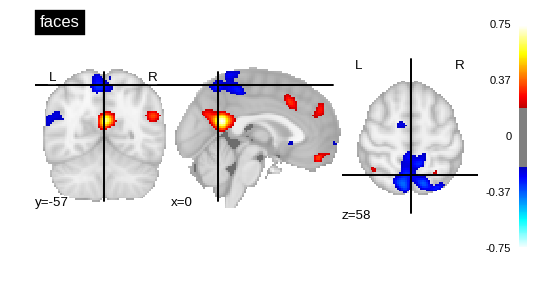

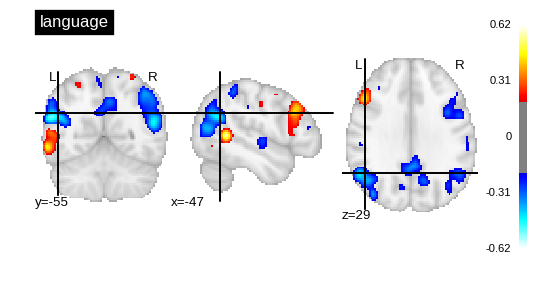

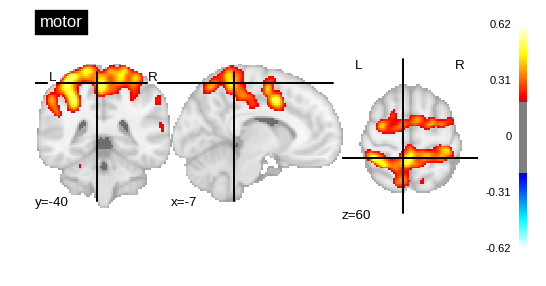

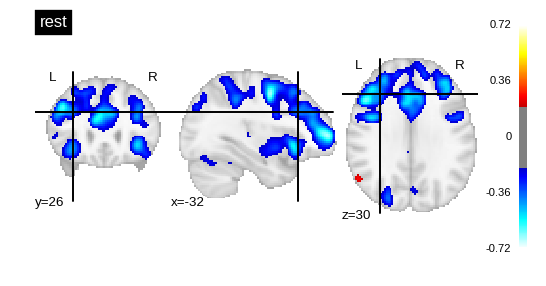

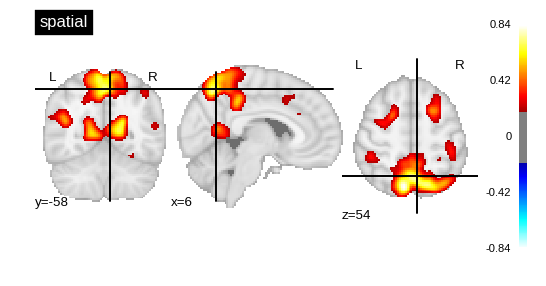

In [16]:
masker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
                                smoothing_fwhm=8).fit()

blockDf = makeBigDf(imgList,masker)
meanBlockDf = blockDf.groupby(level=0).mean()

for cond in meanBlockDf.index:
    fig,ax1 = plt.subplots(1,1,figsize=(8,4))
    thisIm = rawMasker.inverse_transform(meanBlockDf.loc[cond])
    plotting.plot_stat_map(thisIm,title=cond,threshold=0.2,axes=ax1)
    plt.show()

## Cross-validation of training data

Splitting the data in half

In [17]:
def makeHalfDf(bigDf,start,stop):
    halfDf = pd.DataFrame()
    # for each domain
    for cond in bigDf.index.levels[0]:
        thisDf = bigDf.ix[cond]
        # take the block's domains from start to top
        thisHalf = thisDf.ix[start:stop]
        # update the index
        thisHalf.index = [[cond]*thisHalf.shape[0],thisHalf.index]
        
        halfDf = pd.concat([halfDf,thisHalf])
    return halfDf

In [18]:
thisHalfDf = makeHalfDf(blockDf,0,5)

In [19]:
thisHalfDf

0         1         2         3         4       \
faces    004-family       -0.014855 -0.024355 -0.027687 -0.038244 -0.043698   
         007-friends       0.039879  0.048562  0.045989  0.044050  0.053268   
         013-movieactors  -0.017098 -0.003029  0.012788 -0.004869  0.008069   
         016-athletes      0.014403  0.030208  0.031041  0.016924  0.030390   
         024-tvactors     -0.059488 -0.045062 -0.038207 -0.052990 -0.046659   
language 002-animals      -0.142396 -0.131228 -0.121068 -0.134855 -0.129466   
         006-tools        -0.020244 -0.019242 -0.019718 -0.069268 -0.069323   
         012-cities       -0.012526 -0.008699 -0.001112  0.009196  0.011046   
         018-countries    -0.088297 -0.088354 -0.090098 -0.112259 -0.116504   
         021-occupations   0.033783  0.024877  0.008248  0.037207  0.028291   
motor    005-badminton     0.049163  0.039504  0.026184  0.051281  0.042552   
         010-tennis       -0.046340 -0.071818 -0.098419 -0.026589 -0.053292   
         015-swimming     -0.104208 -0.095929 -0.075849 -0.085378 -0.079494   
         020-soccer        0.024488 -0.001562 -0.003851  0.036457  0.003897   
         025-highjump     -0.082450 -0.088737 -0.078928 -0.105719 -0.102011   
rest     001-rest         -0.074891 -0.047138 -0.026351 -0.070407 -0.040189   
         009-rest          0.107405  0.101262  0.094894  0.091795  0.087839   
         014-rest          0.101808  0.115414  0.115091  0.147143  0.150698   
         019-rest          0.080877  0.059017  0.038219  0.084107  0.062782   
         023-rest          0.018406  0.050442  0.064114 -0.005505  0.033575   
spatial  003-citysquare    0.072830  0.061535  0.057645  0.065341  0.059341   
         008-market        0.098370  0.083839  0.070983  0.113654  0.097646   
         011-tramstation   0.010832  0.000137  0.001034 -0.006973 -0.011596   
         017-trainstation  0.027555  0.016808  0.016023  0.024159  0.019930   
         022-school        0.002312  0.008807  0.008743  0.010403  0.015416   

                             5         6         7         8         9       \
faces    004-family       -0.056847 -0.051843 -0.050397 -0.060623  0.117202   
         007-friends       0.013482  0.025875  0.035157 -0.002446  0.033470   
         013-movieactors  -0.008523 -0.000716  0.007047 -0.002022 -0.068285   
         016-athletes     -0.001624  0.016587  0.021991  0.012503  0.028999   
         024-tvactors     -0.046383 -0.039629 -0.039846 -0.023099 -0.189310   
language 002-animals      -0.114757 -0.116099 -0.114060 -0.093008 -0.158958   
         006-tools        -0.088401 -0.093164 -0.093046 -0.089797 -0.003129   
         012-cities        0.021717  0.016825  0.019944  0.014474 -0.052571   
         018-countries    -0.100073 -0.106839 -0.114200 -0.081007  0.022557   
         021-occupations   0.040323  0.046723  0.041684  0.055882 -0.017455   
motor    005-badminton     0.064825  0.063947  0.054094  0.080180  0.051020   
         010-tennis       -0.006602 -0.024551 -0.047615 -0.039516 -0.088557   
         015-swimming     -0.065095 -0.075426 -0.074180 -0.075171 -0.182189   
         020-soccer        0.091055  0.052688  0.014688  0.068767 -0.041612   
         025-highjump     -0.103739 -0.108699 -0.096086 -0.095954  0.070492   
rest     001-rest         -0.081575 -0.055253 -0.028157 -0.035545 -0.070899   
         009-rest          0.051872  0.053147  0.053124  0.006663  0.093231   
         014-rest          0.134617  0.151339  0.145099  0.120375  0.049626   
         019-rest          0.076000  0.066860  0.046776  0.035075  0.137378   
         023-rest         -0.066806 -0.028938  0.016479 -0.044827  0.108004   
spatial  003-citysquare    0.072479  0.062055  0.058607  0.067181  0.076340   
         008-market        0.140572  0.127385  0.111898  0.137497  0.055664   
         011-tramstation   0.001663 -0.005149 -0.000168  0.012345  0.055495   
         017-trainstation  0.031581  0.027529  0.031275  0.036670 -0.009195   

In [20]:
otherHalfDf = makeHalfDf(blockDf,5,10)

In [21]:
otherHalfDf

0         1         2         3         4       \
faces    029-politicians   0.175263  0.160685  0.130618  0.191024  0.171995   
         033-lectureres    0.084158  0.086470  0.067347  0.078017  0.078071   
         036-teachers     -0.316378 -0.257089 -0.171713 -0.329105 -0.261805   
         042-family        0.077669  0.083928  0.075971  0.099875  0.106373   
         047-friends      -0.075450 -0.073649 -0.062537 -0.084905 -0.083546   
language 028-fruits       -0.048764 -0.068557 -0.075046 -0.064613 -0.086334   
         034-clothing     -0.003983 -0.012891 -0.020012  0.008355 -0.003304   
         039-vegetables   -0.107487 -0.080969 -0.036537 -0.138516 -0.121899   
         044-furniture    -0.042130 -0.041882 -0.042831 -0.058676 -0.060160   
         048-colors       -0.002959 -0.012495 -0.024622 -0.000938 -0.009005   
motor    030-climbing     -0.009813 -0.016283 -0.025030 -0.001519 -0.006817   
         035-huerdlerace  -0.193711 -0.152289 -0.074525 -0.234243 -0.181042   
         040-archery      -0.059648 -0.041449 -0.020979 -0.066441 -0.042687   
         045-ropeskipping  0.128563  0.121458  0.103920  0.141000  0.134892   
         050-juggling      0.296871  0.265031  0.196686  0.340038  0.290687   
rest     027-rest          0.102956  0.102810  0.097533  0.136710  0.132491   
         031-rest          0.081747  0.062045  0.033709  0.060634  0.043437   
         037-rest         -0.154840 -0.131709 -0.099935 -0.171588 -0.141749   
         043-rest         -0.020974 -0.009851 -0.000733 -0.022217 -0.007715   
         046-rest         -0.046426 -0.043535 -0.024479 -0.082196 -0.067649   
spatial  026-church        0.223630  0.188620  0.125171  0.268114  0.221804   
         032-basement     -0.041100 -0.046069 -0.050791 -0.060103 -0.073092   
         038-promenade    -0.163325 -0.177723 -0.180129 -0.162763 -0.162859   
         041-cityofkiel   -0.117256 -0.090441 -0.047598 -0.122760 -0.089177   
         049-univesity     0.187252  0.150620  0.097614  0.218440  0.170987   

                             5         6         7         8         9       \
faces    029-politicians   0.174951  0.187718  0.164957  0.170626  0.218364   
         033-lectureres    0.061531  0.079921  0.077067  0.085344 -0.024811   
         036-teachers     -0.322609 -0.311057 -0.249230 -0.264032 -0.174428   
         042-family        0.087597  0.107678  0.112091  0.097615  0.063419   
         047-friends      -0.058173 -0.081237 -0.084067 -0.071012 -0.052724   
language 028-fruits       -0.044052 -0.061752 -0.082252 -0.044685 -0.044456   
         034-clothing      0.037553  0.029114  0.014732  0.050812 -0.004098   
         039-vegetables   -0.147086 -0.157704 -0.141634 -0.156542  0.130185   
         044-furniture    -0.057200 -0.059278 -0.055509 -0.056904 -0.006842   
         048-colors        0.005088 -0.001729 -0.012793 -0.001927  0.010977   
motor    030-climbing      0.006778  0.003251  0.005032  0.004589  0.027663   
         035-huerdlerace  -0.245312 -0.253435 -0.204936 -0.239324  0.039578   
         040-archery      -0.064121 -0.067578 -0.046507 -0.067299  0.045795   
         045-ropeskipping  0.124503  0.140733  0.135448  0.135200  0.166775   
         050-juggling      0.335529  0.354428  0.299417  0.343376  0.109817   
rest     027-rest          0.139113  0.153023  0.147476  0.149464  0.082376   
         031-rest          0.038890  0.031942  0.011872 -0.003917  0.105656   
         037-rest         -0.167845 -0.167006 -0.133679 -0.144272 -0.170886   
         043-rest         -0.038104 -0.026818 -0.004291 -0.029861  0.009651   
         046-rest         -0.110066 -0.118207 -0.098547 -0.144007 -0.123772   
spatial  026-church        0.263701  0.265698  0.219562  0.223942 -0.039844   
         032-basement     -0.043296 -0.060824 -0.077660 -0.048601 -0.058503   
         038-promenade    -0.147720 -0.153447 -0.140881 -0.141180 -0.224724   
         041-cityofkiel   -0.129301 -0.127705 -0.094319 -0.125368 -0.118116   

### compare the two halves

In [24]:
thisHalfMeanDf = thisHalfDf.groupby(level=0).mean()
otherHalfMeanDf = otherHalfDf.groupby(level=0).mean()

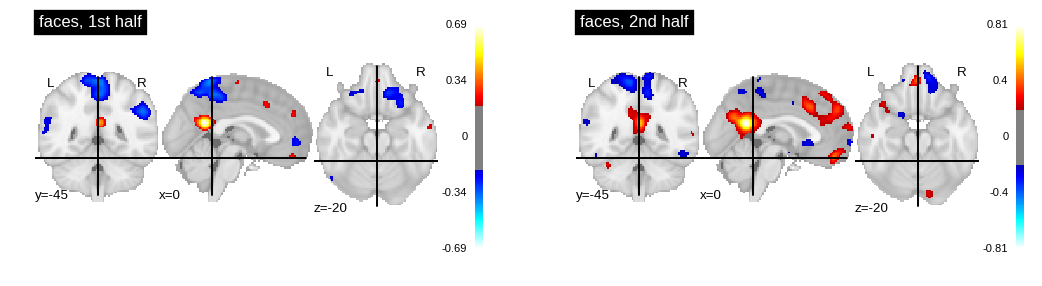

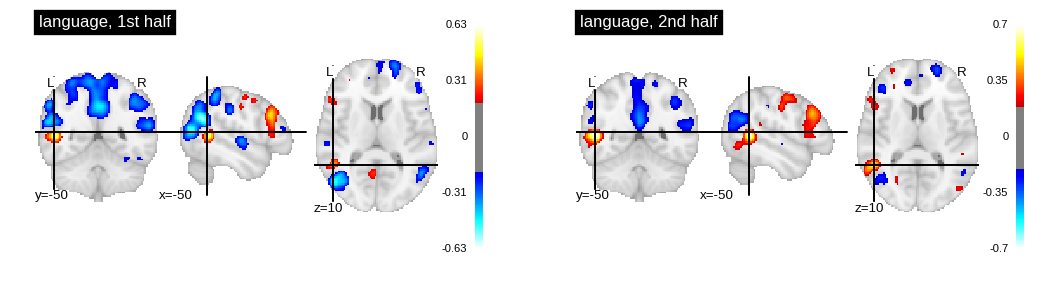

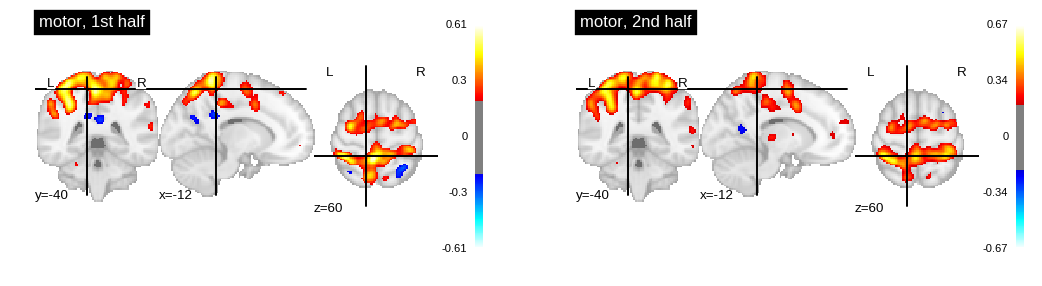

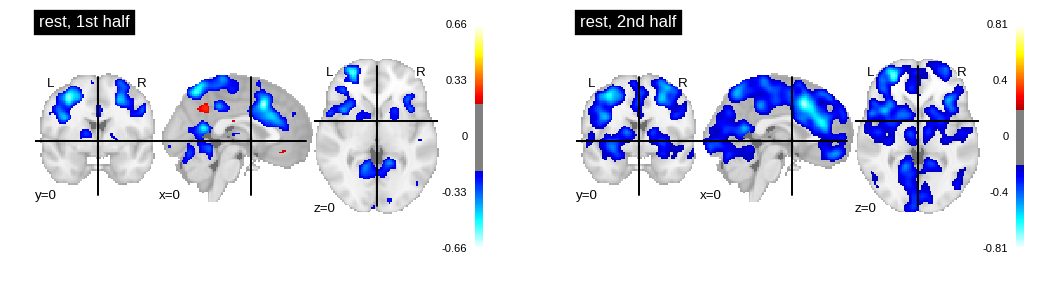

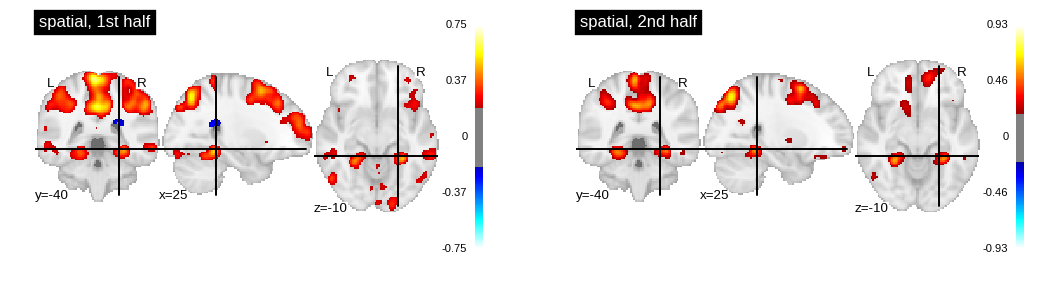

In [33]:
coords = [(0,-45,-20),(-50,-50,10),(-12,-40,60),(0,0,0),(25,-40,-10)]
for cond,coord in zip(thisHalfMeanDf.index,coords):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
    thisA = masker.inverse_transform(thisHalfMeanDf.ix[cond])
    thisB = masker.inverse_transform(otherHalfMeanDf.ix[cond])
    display = plotting.plot_stat_map(thisA,title='%s, 1st half'%cond,threshold=0.2,axes=ax1,cut_coords=coord)
    plotting.plot_stat_map(thisB,title='%s, 2nd half'%cond,threshold=0.2,axes=ax2,cut_coords=display.cut_coords)
    plt.show()

### correlate the blocks of one half with the average of the other half

In [34]:
def makeCorrs(thisHalfDf,otherHalfDf,thisHalfMeanDf,otherHalfMeanDf):
    
    thisCorrDf = pd.DataFrame(np.corrcoef(otherHalfMeanDf,thisHalfDf)[5:,:5],
                        index=thisHalfDf.index,
                        columns=otherHalfMeanDf.index)
    
    otherCorrDf = pd.DataFrame(np.corrcoef(thisHalfMeanDf,otherHalfDf)[5:,:5],
                        index=otherHalfDf.index,
                        columns=thisHalfMeanDf.index)
    
    mergeDf = pd.concat([thisCorrDf,otherCorrDf])
    mergeDf.sort_index(inplace=True)
    
    return mergeDf

In [35]:
myCorrDf = makeCorrs(thisHalfDf,otherHalfDf,thisHalfMeanDf,otherHalfMeanDf)

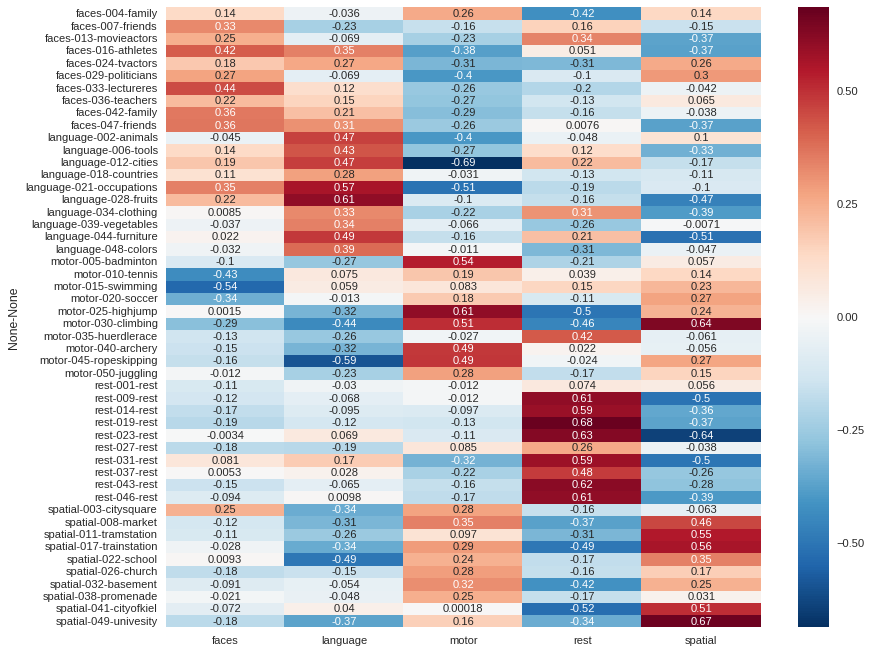

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(myCorrDf,annot=True)
plt.show()

### apply a decision rule (winner take all)

In [40]:
def makeCorrPred(myCorrDf):
    
    # empty dictionary to write to
    d = {}

    # for each row (block)
    for cond,num in myCorrDf.index:

        thisDf = myCorrDf.loc[cond].loc[num]
        # get the highest value
        winner = thisDf.idxmax()
        # store the real condition, the winning condition and the evaluation whether both match
        d[num] = {'real':cond, 'winner':winner,'hit':cond==winner  }
        
    # convert dictionary to dataframe
    predDf = pd.DataFrame(d).T

    # compute the % correct
    percentCorrect = np.mean( [int(x) for x in predDf['hit']] )*100
    
    return predDf,percentCorrect

In [41]:
corrPredDf,corrPcCorrect = makeCorrPred(myCorrDf)

In [42]:
corrPredDf

,hit,real,winner
001-rest,True,rest,rest
002-animals,True,language,language
003-citysquare,False,spatial,motor
004-family,False,faces,motor
005-badminton,True,motor,motor
006-tools,True,language,language
007-friends,True,faces,faces
008-market,True,spatial,spatial
009-rest,True,rest,rest
010-tennis,True,motor,motor


### make a confusion matrix

In [48]:
for i in myCorrDf.index:
    print i

('faces', '004-family')
('faces', '007-friends')
('faces', '013-movieactors')
('faces', '016-athletes')
('faces', '024-tvactors')
('faces', '029-politicians')
('faces', '033-lectureres')
('faces', '036-teachers')
('faces', '042-family')
('faces', '047-friends')
('language', '002-animals')
('language', '006-tools')
('language', '012-cities')
('language', '018-countries')
('language', '021-occupations')
('language', '028-fruits')
('language', '034-clothing')
('language', '039-vegetables')
('language', '044-furniture')
('language', '048-colors')
('motor', '005-badminton')
('motor', '010-tennis')
('motor', '015-swimming')
('motor', '020-soccer')
('motor', '025-highjump')
('motor', '030-climbing')
('motor', '035-huerdlerace')
('motor', '040-archery')
('motor', '045-ropeskipping')
('motor', '050-juggling')
('rest', '001-rest')
('rest', '009-rest')
('rest', '014-rest')
('rest', '019-rest')
('rest', '023-rest')
('rest', '027-rest')
('rest', '031-rest')
('rest', '037-rest')
('rest', '043-rest')

In [52]:
def makeConfusion(corrDf):
    
    d = {}
    # for all rows (blocks)
    for i in corrDf.index:
        # the first entry in the index is the actual condition
        correct = i[0]
        # the prediciton is the one with the highest value
        predicted = corrDf.loc[i].idxmax()
        # we add to the dictionary, if that condition already exists
        try:
            d[correct].append(predicted)
        # otherwise, we add the condition to the dict
        except:
            d[correct] = [predicted]
    df = pd.DataFrame(d)

    # make a new dict
    d = {}
    # for each column in the new dataframe, where each column is the condition
    # and each row is a prediction
    for true in df.columns:
        # for this condition, start a new entry
        d[true] = {}
        # for each condition
        for pred in df.columns:
            # get the average number of times where a certain condition was predicted,
            # given what the correct answer would have been
            d[true][pred] = (df[true]==pred).mean()

    # make into dataframe and format 
    confDf = pd.DataFrame(d).T
    confDf.index= [['True']*len(confDf.index),confDf.index]
    confDf.columns= [['Predicted']*len(confDf.columns),confDf.columns]
    
    return confDf*100 # convert to percent

In [53]:
confDf = makeConfusion(myCorrDf)

In [54]:
confDf

Predicted                              
                  faces language motor   rest spatial
True faces         60.0     10.0  10.0   10.0    10.0
     language       0.0    100.0   0.0    0.0     0.0
     motor          0.0      0.0  60.0   10.0    30.0
     rest           0.0      0.0   0.0  100.0     0.0
     spatial        0.0      0.0  40.0    0.0    60.0

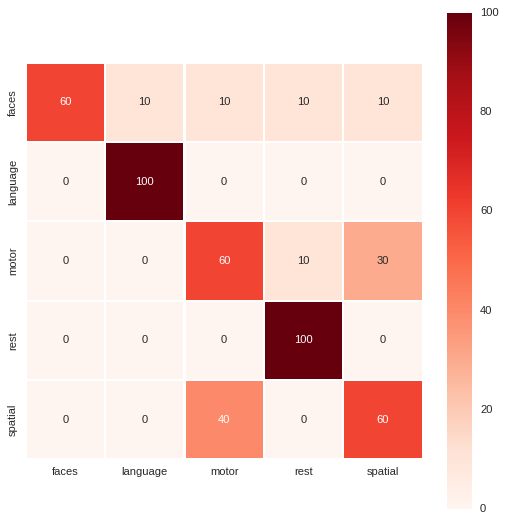

In [55]:
fig,ax = plt.subplots(1,1,figsize=(8,8))

sns.heatmap(confDf.loc['True']['Predicted'].astype(int),
            square=True,cmap=('Reds'),vmin=0,vmax=100,fmt='.3g',
            linewidths=1,annot=True,ax=ax )
plt.show()

In [56]:
print "%i%% correct predictions!" % corrPcCorrect

76% correct predictions!


Everything above was done using a whole-brain mask with 8mm smoothing. Now, we want to try to engage in feature selection and iteratively tweak the voxel selection and the smoothing kernel

## creating a mask

The goal here is to use one half of the data, the half which is averaged, to create a mask, so that the correlations we compute are only between certain voxel. The criterium is that only voxel with high values in the average half are used for correlations. This is circular as long as we only describe the average data, but because the block-wise data from the other half are not implied in this feature selection, it is not ciruclar when computing the correlations.

In [87]:
def makeMasks(meanDf,pc):
    roiDict = {}
    
    # because we will edit the dataframe, we first make a deep copy
    copyDf = meanDf.copy()

    for cond in copyDf.index:

        thisCond = copyDf.ix[cond]
        
        # identify only cells that are above a certian percentile for that condition
        thisPercentile = np.percentile(thisCond,pc)
        
        # binarize the map at that percentile
        thisCond[thisCond>=thisPercentile]=999999
        thisCond[thisCond<999999] = 0
        thisCond[thisCond>0] = 1

        roiDict[cond] = thisCond
    
    roiDf = pd.DataFrame(roiDict).T
    
    return roiDf

Example for the 50th percentile

In [88]:
roiDf = makeMasks(thisHalfMeanDf,50)

In [89]:
roiDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
faces,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
language,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
motor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
spatial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
def plotRois(roiDf,meanDf):
    for cond in roiDf.index:
        fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

        thisOrigImg = masker.inverse_transform(meanDf.ix[cond])
        thisMaskImg = masker.inverse_transform(roiDf.ix[cond])

        display = plotting.plot_stat_map(thisOrigImg,threshold=0.0,axes=ax1,title=cond)
        plotting.plot_roi(thisMaskImg,title=cond,cut_coords=display.cut_coords,axes=ax2)

        plt.show()

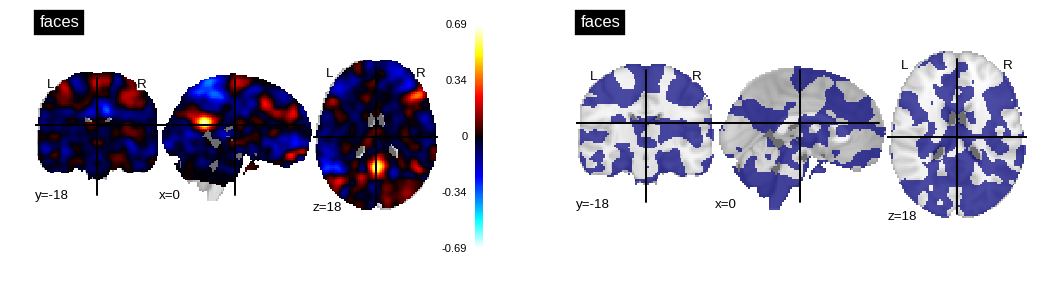

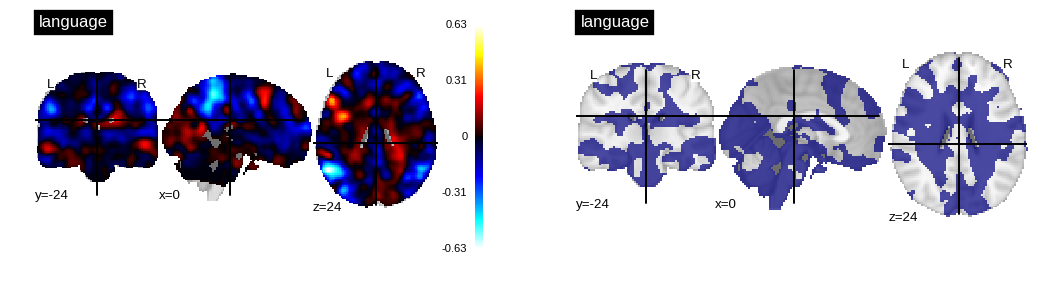

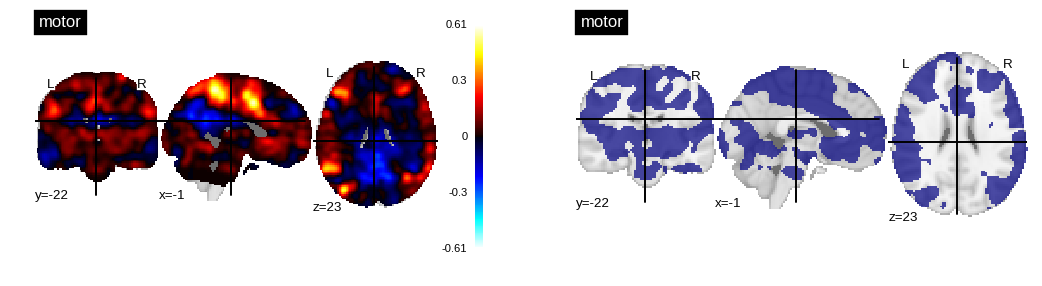

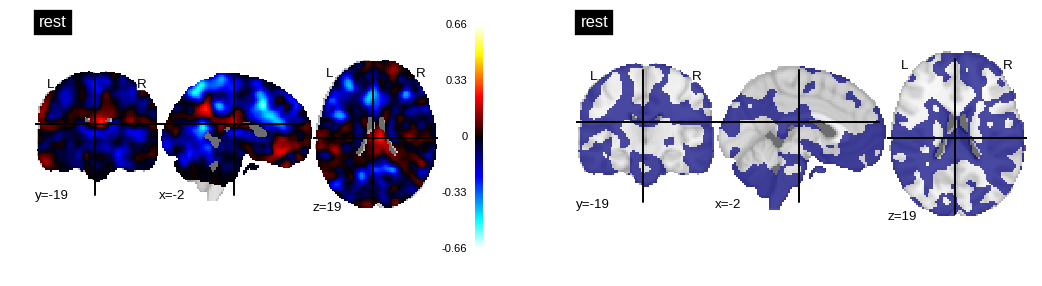

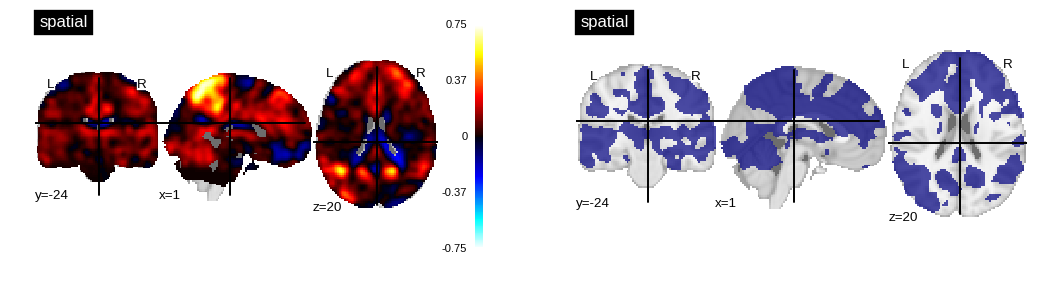

In [91]:
roiDf = makeMasks(thisHalfMeanDf,50)
plotRois(roiDf,thisHalfMeanDf)

### Das Gleiche für Percentil 99

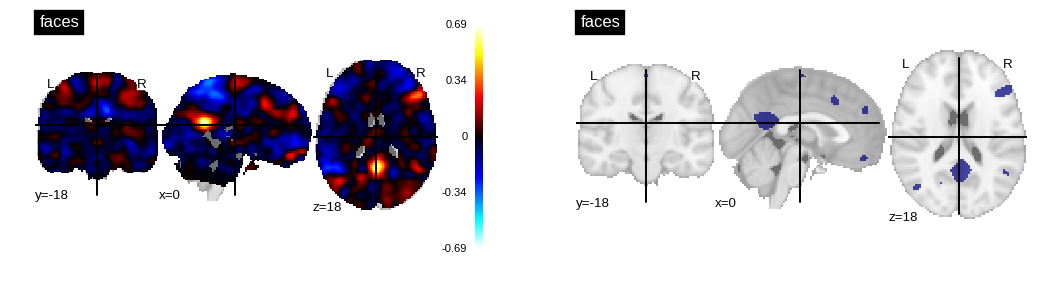

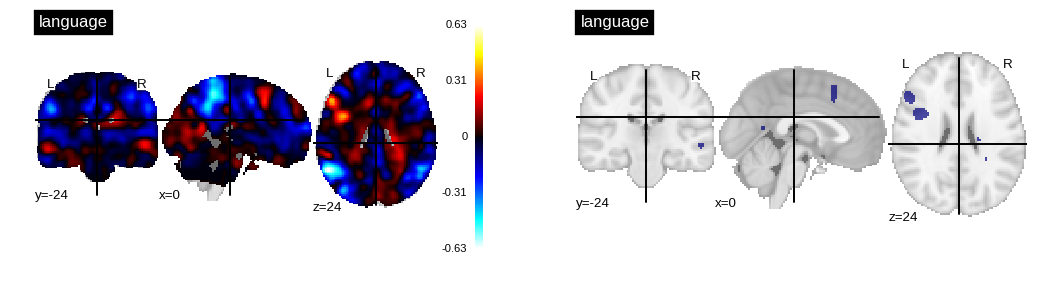

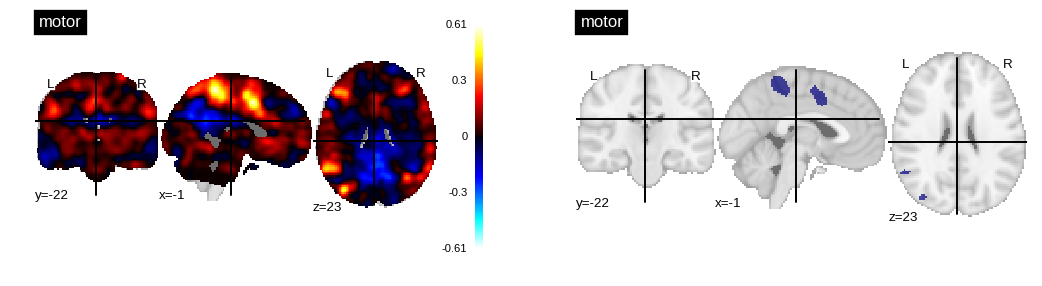

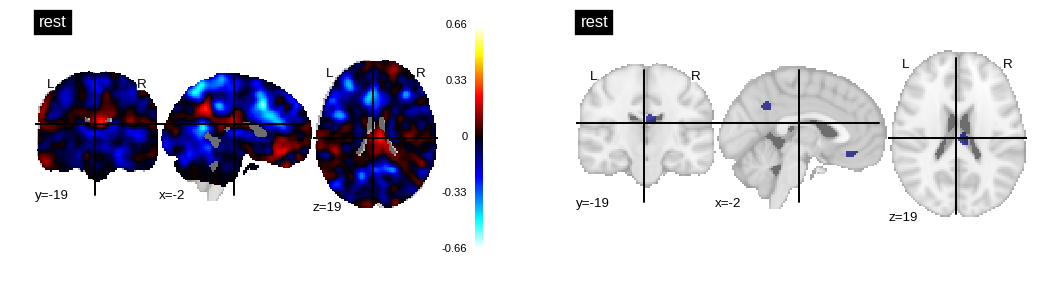

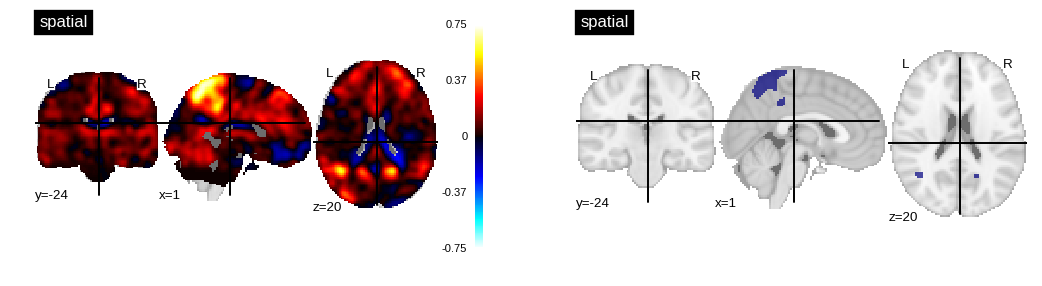

In [92]:
roiDf = makeMasks(thisHalfMeanDf,99)
plotRois(roiDf,thisHalfMeanDf)

### Turn the results into one mask

In [93]:
def mergeRois(roiDf):
    
    copyDf = roiDf.copy()
    # add up the five masks
    sumDf = pd.DataFrame( copyDf.sum(axis=0) )
    # binarize the summary mask
    sumDf[sumDf>0] = 1
    sumDf[sumDf<1] = 0
    
    return sumDf.T

In [94]:
thisBigRoi = mergeRois(roiDf)

In [95]:
thisBigRoiImg = masker.inverse_transform(thisBigRoi.values)

Comparison of the five masks and their combination

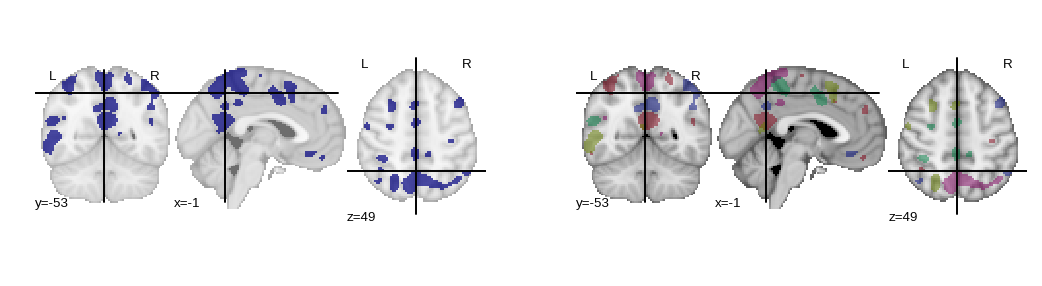

In [96]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
display = plotting.plot_roi(thisBigRoiImg,axes=ax1);
plotting.plot_prob_atlas( masker.inverse_transform(np.array(roiDf)),cut_coords=display.cut_coords,axes=ax2 )
plt.show()

### Define new masker object

This masks are in turn used to extract data. They define which voxels are considered and by turning them into masker objects, we can now determine how strongly we want to smooth the data we extract from them.

Example without smoothing

In [97]:
roiMasker = input_data.NiftiMasker(mask_img=thisBigRoiImg,smoothing_fwhm=0).fit()

In [98]:
roiMasker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f45cb6bddd0>,
      mask_strategy='background', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=0,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

Zum Vergleich: die alte "whole-brain" Maske links und unsere sehr spartanische "Klecks-Maske" rechts:  

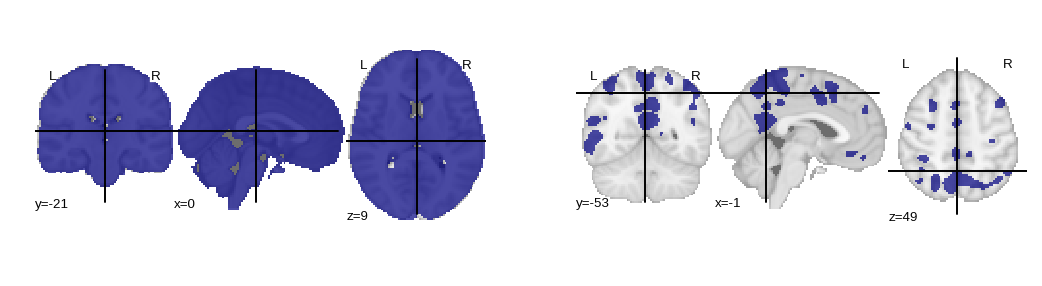

In [99]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
plotting.plot_roi(masker.mask_img_,axes=ax1)
plotting.plot_roi(roiMasker.mask_img_,axes=ax2)
plt.show()

## Training

In [100]:
def makeMasker(voxelPc,smoo,start,stop,imgList=imgList,masker=masker):
    # get the data
    blockDf = makeBigDf(imgList,masker)
    # get the half used for mask creation
    thisHalfDf = makeHalfDf(blockDf,start,stop)
    thisHalfMeanDf = thisHalfDf.groupby(level=0).mean()
    # make the 5 masks
    roiDf = makeMasks(thisHalfMeanDf,voxelPc)
    # merge the 5 masks
    thisBigRoi = mergeRois(roiDf)
    # make mask image
    thisBigRoiImg = masker.inverse_transform(thisBigRoi.values)
    # make masker object from mask + the setting of a smoothing kernel
    roiMasker = input_data.NiftiMasker(mask_img=thisBigRoiImg,smoothing_fwhm=smoo).fit()
    
    return roiMasker

Example: no voxel selection (percentile zero), no smoothing, first half (0-5)

In [101]:
roiMasker = makeMasker(0,0,0,5)

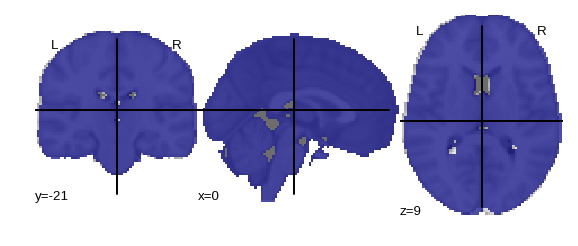

In [103]:
plotting.plot_roi( roiMasker.mask_img_ )

Example: voxel selection (percentile 80), no smoothing, first half (0-5)

In [170]:
roiMasker = makeMasker(80,0,0,5)

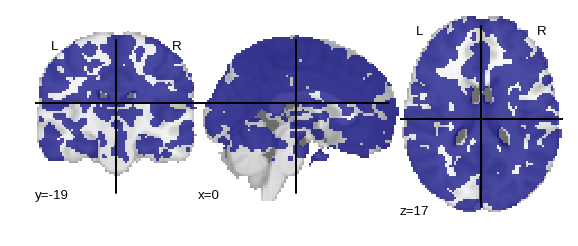

In [171]:
plotting.plot_roi( roiMasker.mask_img_ )

### check actual ROI size

In [172]:
checkMasker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz').fit()

In [173]:
nVoxel = (checkMasker.transform(roiMasker.mask_img)>-99).sum()

In [174]:
nVoxel

228483

In [175]:
thisN = (checkMasker.transform(roiMasker.mask_img_)>0).sum()

In [176]:
thisN

162177

In [177]:
thisN/float(nVoxel)

0.7097989784797993

check for 99th percentile

In [178]:
roiMasker = makeMasker(99,0,0,5)
thisN = (checkMasker.transform(roiMasker.mask_img_)>0).sum()
print thisN/float(nVoxel)

0.047570278751592025


### combine data splitting with mask creation and applying of mask and making of predictions

In [108]:
def makeEverything(voxelPc,smoo,imgList=imgList,masker=masker):
    
    # first fold
    
    # define feature space through first half
    thisRoiMasker = makeMasker(voxelPc,smoo,0,5)
    # exctract data using features selected based on first half
    thisBlockMaskDf = makeBigDf(imgList,thisRoiMasker)
    # get the average of first half
    thisHalfMeanMaskDf = makeHalfDf(thisBlockMaskDf,0,5).groupby(level=0).mean()
    # get the single blocks of the second half from the features space defined by the first half
    otherHalfMaskDf = makeHalfDf(thisBlockMaskDf,5,10)

    # second fold
    
    # define the feature space through second half
    otherRoiMasker = makeMasker(voxelPc,smoo,5,10)
    # extract data using feataures selected based on second half
    otherBlockMaskDf = makeBigDf(imgList,otherRoiMasker)
    # get the average of second half
    otherHalfMeanMaskDf = makeHalfDf(otherBlockMaskDf,5,10).groupby(level=0).mean()
    # get the single block of first half...
    thisHalfMaskDf = makeHalfDf(otherBlockMaskDf,0,5)

    # correlate    
    myCorrDf = makeCorrs(thisHalfMaskDf,otherHalfMaskDf,thisHalfMeanMaskDf,otherHalfMeanMaskDf)

    # predict
    corrPredDf,corrPcCorrect = makeCorrPred(myCorrDf)
    
    return myCorrDf,corrPredDf,corrPcCorrect

In [109]:
########### enter values here ###########
pc = 99 # percentile
smoo = 0 # smoothing
###########################################

myCorrDf,corrPredDf,corrPcCorrect = makeEverything(pc,smoo)

reformat table for plotting

In [110]:
myOrder = ['language','motor','spatial','faces','rest']
myCorrDf = myCorrDf.reindex(myOrder,level=0)
myCorrDf = myCorrDf[myOrder]

### show single predictions

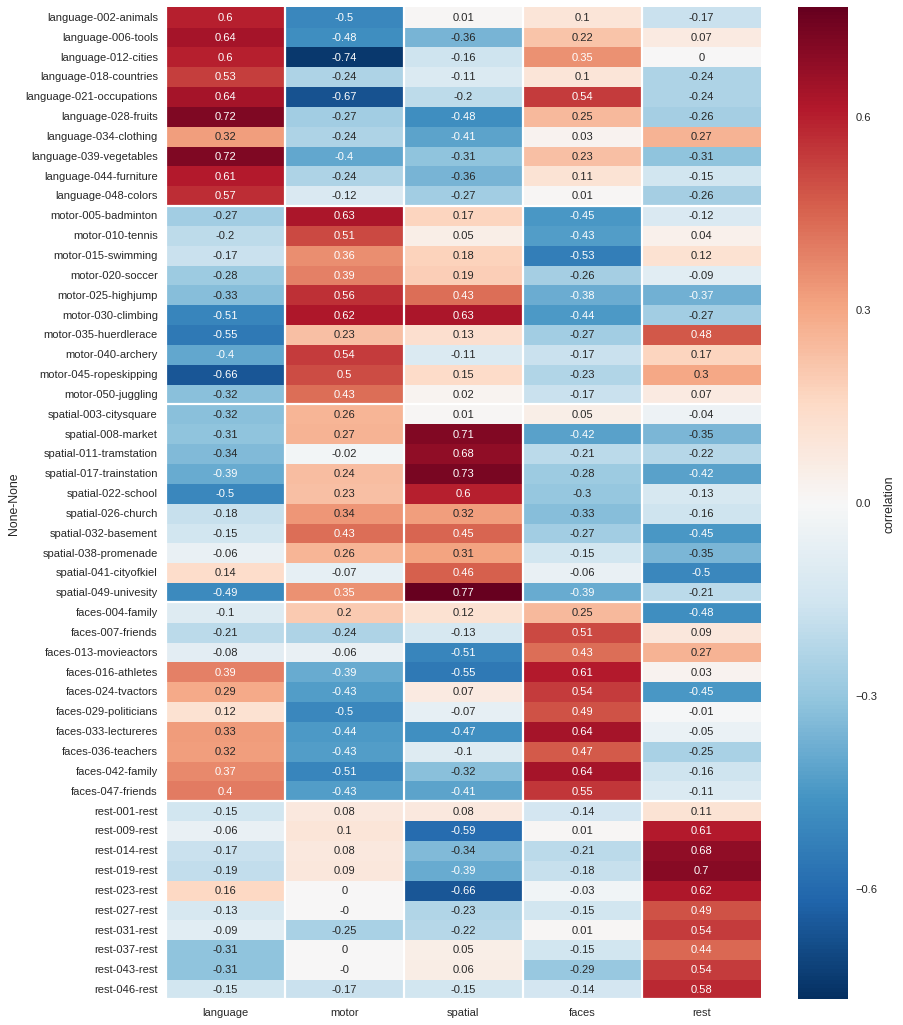

In [111]:
plt.figure(figsize=(12,16))
sns.heatmap(myCorrDf.round(2),annot=True,
            cbar_kws={"label": "correlation"} ) 
for i in range(0,50,10):
    plt.axhline(i,c='white',linewidth=2)
for i in range(0,5,1):
    plt.axvline(i,c='white',linewidth=2)
plt.savefig('../figs/fig4_trainHeat.png',dpi=300,bbox_inches='tight')
plt.show()

In [112]:
corrPredDf,corrPcCorrect = makeCorrPred(myCorrDf)
corrPredDf

,hit,real,winner
001-rest,True,rest,rest
002-animals,True,language,language
003-citysquare,False,spatial,motor
004-family,True,faces,faces
005-badminton,True,motor,motor
006-tools,True,language,language
007-friends,True,faces,faces
008-market,True,spatial,spatial
009-rest,True,rest,rest
010-tennis,True,motor,motor


In [113]:
print "now we reach %i%% correct predictions!" % corrPcCorrect

now we reach 92% correct predictions!


### show confusion matrix

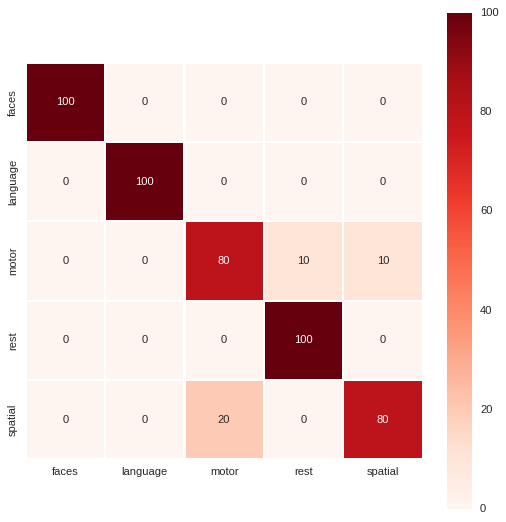

In [114]:
confDf = makeConfusion(myCorrDf)

fig,ax = plt.subplots(1,1,figsize=(8,8))

sns.heatmap(confDf.loc['True']['Predicted'].astype(int),
            square=True,cmap=('Reds'),vmin=0,vmax=100,fmt='.3g',
            linewidths=1,annot=True,ax=ax )
plt.show()

### loop through feature space to find the best parameter combination  

Here we start at the 80th percentile, because this is still very large regarding how much gray matter is included and because we know from trying out lower percentiles, that the best accuarcies are reached for the very highest values.

In [123]:
def makeAccMap(imgList,masker):
    d = {}
    for pc in range(80,100):
        #print pc
        d[pc] = {}
        for smoo in range(0,20):
            #print smoo
            myCorrDf,corrPredDf,corrPcCorrect = makeEverything(pc,smoo,imgList=imgList,masker=masker)
            d[pc][smoo]=corrPcCorrect
            
    featureDf = pd.DataFrame(d)
    
    featureDf.index=[['smoo']*featureDf.shape[0],featureDf.index]
    featureDf.columns=[['voxel']*featureDf.shape[1],featureDf.columns]
    featureDf.sort_index(axis=0,inplace=True)
    featureDf.sort_index(axis=1,inplace=True)
    
    return featureDf

In [116]:
from datetime import datetime

In [117]:
print datetime.now()
featureDf = makeAccMap(imgList,masker)
featureDf.T.to_csv('../tables/featureDfTraining.csv')
print datetime.now()

2018-02-16 10:21:49.035835
2018-02-16 14:39:50.289154


In [140]:
featureDf = pd.read_csv('../tables/featureDfTraining.csv',index_col=[0,1],header=[0,1])

In [141]:
featureDf

smoo                                            \
                             0     1     2     3     4     5     6     7   
      Unnamed: 1_level_2                                                   
voxel 80                  76.0  76.0  76.0  76.0  76.0  78.0  78.0  78.0   
      81                  76.0  76.0  76.0  76.0  78.0  78.0  78.0  78.0   
      82                  76.0  76.0  76.0  76.0  78.0  78.0  78.0  78.0   
      83                  76.0  76.0  76.0  76.0  78.0  78.0  78.0  78.0   
      84                  76.0  76.0  76.0  78.0  78.0  78.0  78.0  78.0   
      85                  76.0  76.0  76.0  78.0  78.0  78.0  78.0  78.0   
      86                  76.0  76.0  76.0  78.0  78.0  78.0  78.0  78.0   
      87                  76.0  76.0  78.0  78.0  78.0  78.0  78.0  78.0   
      88                  78.0  78.0  78.0  78.0  78.0  78.0  78.0  78.0   
      89                  80.0  80.0  78.0  78.0  78.0  78.0  80.0  80.0   
      90                  80.0  80.0  78.0  78.0  78.0  80.0  80.0  80.0   
      91                  80.0  80.0  78.0  78.0  78.0  80.0  80.0  80.0   
      92                  80.0  80.0  78.0  78.0  82.0  82.0  82.0  80.0   
      93                  82.0  82.0  80.0  84.0  84.0  84.0  84.0  84.0   
      94                  80.0  80.0  82.0  84.0  86.0  86.0  86.0  86.0   
      95                  84.0  84.0  86.0  86.0  86.0  86.0  86.0  86.0   
      96                  84.0  84.0  84.0  88.0  88.0  86.0  86.0  86.0   
      97                  88.0  88.0  90.0  90.0  92.0  92.0  92.0  90.0   
      98                  92.0  92.0  90.0  92.0  92.0  92.0  92.0  92.0   
      99                  92.0  92.0  92.0  92.0  90.0  90.0  90.0  90.0   

                                                                          \
                             8     9    10    11    12    13    14    15   
      Unnamed: 1_level_2                                                   
voxel 80                  78.0  78.0  78.0  78.0  76.0  76.0  76.0  76.0   
      81                  78.0  78.0  78.0  78.0  76.0  76.0  76.0  76.0   
      82                  78.0  78.0  78.0  78.0  76.0  76.0  76.0  76.0   
      83                  78.0  78.0  78.0  78.0  76.0  76.0  76.0  76.0   
      84                  78.0  78.0  78.0  78.0  76.0  76.0  76.0  76.0   
      85                  78.0  78.0  78.0  78.0  76.0  76.0  76.0  76.0   
      86                  78.0  78.0  78.0  76.0  76.0  76.0  76.0  76.0   
      87                  78.0  78.0  78.0  76.0  76.0  76.0  76.0  76.0   
      88                  80.0  80.0  80.0  78.0  78.0  78.0  76.0  76.0   
      89                  80.0  80.0  80.0  78.0  78.0  78.0  78.0  78.0   
      90                  80.0  80.0  80.0  78.0  78.0  78.0  78.0  78.0   
      91                  80.0  80.0  80.0  78.0  78.0  78.0  78.0  78.0   
      92                  80.0  80.0  80.0  78.0  78.0  78.0  78.0  78.0   
      93                  86.0  84.0  82.0  80.0  80.0  80.0  80.0  80.0   
      94                  86.0  86.0  84.0  84.0  82.0  80.0  80.0  80.0   
      95                  86.0  86.0  84.0  84.0  84.0  84.0  84.0  82.0   
      96                  86.0  86.0  84.0  84.0  84.0  84.0  84.0  84.0   
      97                  88.0  88.0  84.0  84.0  84.0  84.0  84.0  82.0   
      98                  88.0  88.0  86.0  86.0  84.0  82.0  82.0  82.0   
      99                  90.0  88.0  88.0  88.0  84.0  84.0  82.0  82.0   

                                                  
                            16    17    18    19  
      Unnamed: 1_level_2                          
voxel 80                  76.0  76.0  74.0  74.0  
      81                  76.0  76.0  76.0  74.0  
      82                  76.0  76.0  76.0  76.0  
      83                  76.0  76.0  76.0  76.0  
      84                  76.0  76.0  76.0  76.0  
      85                  76.0  76.0  76.0  76.0  
      86                  76.0  76.0  76.0  76.0  
      87          

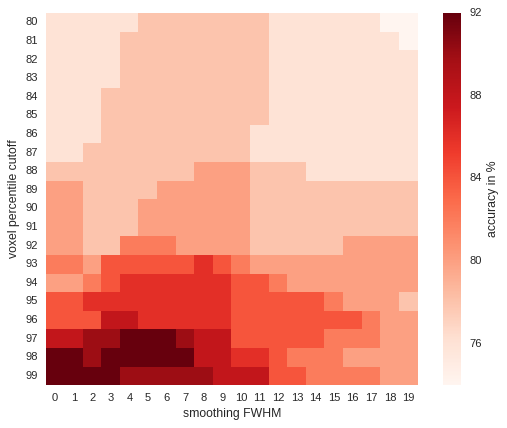

In [142]:
thisMap = featureDf.loc['voxel']['smoo']

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(thisMap,square=True,cmap='Reds',axes=ax)
ax.set_yticklabels(thisMap.index[::-1],rotation=360)
ax.set_ylabel('voxel percentile cutoff')
ax.set_xlabel('smoothing FWHM')
#ax.set_title('Accuracy Map')
cbar = ax.collections[0].colorbar
cbar.set_label('accuracy in %')

plt.savefig('../figs/fig3_featureSelection.png',dpi=300,bbox_inches='tight')

plt.show()